In [1]:
## 1D linear  regression 


In [1]:
import pandas as pd
import matplotlib.pyplot 
%matplotlib inline 

In [4]:
df =pd.read_csv('dataset/Shanghai AQI and Wheather 2014-2021.csv' , encoding='latin-1')

In [8]:
df.head()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
0,2014-01-01,15.0,5.0,0.0,8.7,4.0,0.0,-1.0,11.0,12.0,...,0.0,43.0,0.0,1021.0,15.0,10.0,242.0,12.0,319.0,Hazardous
1,2014-01-02,14.0,7.0,0.0,8.7,4.0,2.0,4.0,11.0,13.0,...,3.0,60.0,0.0,1019.0,14.0,10.0,141.0,14.0,352.0,Hazardous
2,2014-01-03,16.0,9.0,0.0,8.7,4.0,10.0,3.0,11.0,12.0,...,26.0,55.0,0.0,1017.0,16.0,10.0,295.0,14.0,338.0,Hazardous
3,2014-01-04,10.0,4.0,0.0,5.5,2.0,17.0,3.0,7.0,9.0,...,24.0,68.0,0.1,1022.0,10.0,10.0,169.0,14.0,355.0,Hazardous
4,2014-01-05,10.0,3.0,0.0,8.7,3.0,24.0,3.0,9.0,9.0,...,12.0,66.0,0.0,1024.0,10.0,10.0,117.0,6.0,343.0,Hazardous


In [10]:
df.shape

(2502, 22)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2502 non-null   object 
 1   maxtempC           2502 non-null   float64
 2   mintempC           2502 non-null   float64
 3   totalSnow_cm       2502 non-null   float64
 4   sunHour            2502 non-null   float64
 5   uvIndex            2502 non-null   float64
 6   moon_illumination  2502 non-null   float64
 7   DewPointC          2502 non-null   float64
 8   FeelsLikeC         2502 non-null   float64
 9   HeatIndexC         2502 non-null   float64
 10  WindChillC         2502 non-null   float64
 11  WindGustKmph       2502 non-null   float64
 12  cloudcover         2502 non-null   float64
 13  humidity           2502 non-null   float64
 14  precipMM           2502 non-null   float64
 15  pressure           2502 non-null   float64
 16  tempC              2502 

In [14]:
df.isnull().sum()

date                 0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
moon_illumination    0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
AQI                  0
AQI_Explained        0
dtype: int64

In [8]:
df = df.drop_duplicates(keep='first')
df.shape

(2502, 22)

### pre processing the data

In [16]:
df.AQI_Explained.unique()

array(['Hazardous', 'Very unhealthy', 'Unhealthy',
       'Unhealthy for sensitive groups', 'Moderate'], dtype=object)

In [18]:
df.drop(columns=['moon_illumination','WindChillC','FeelsLikeC','HeatIndexC','uvIndex','winddirDegree','WindGustKmph','AQI_Explained'],inplace=True)

In [20]:
df.head()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,DewPointC,cloudcover,humidity,precipMM,pressure,tempC,visibility,windspeedKmph,AQI
0,2014-01-01,15.0,5.0,0.0,8.7,-1.0,0.0,43.0,0.0,1021.0,15.0,10.0,12.0,319.0
1,2014-01-02,14.0,7.0,0.0,8.7,4.0,3.0,60.0,0.0,1019.0,14.0,10.0,14.0,352.0
2,2014-01-03,16.0,9.0,0.0,8.7,3.0,26.0,55.0,0.0,1017.0,16.0,10.0,14.0,338.0
3,2014-01-04,10.0,4.0,0.0,5.5,3.0,24.0,68.0,0.1,1022.0,10.0,10.0,14.0,355.0
4,2014-01-05,10.0,3.0,0.0,8.7,3.0,12.0,66.0,0.0,1024.0,10.0,10.0,6.0,343.0


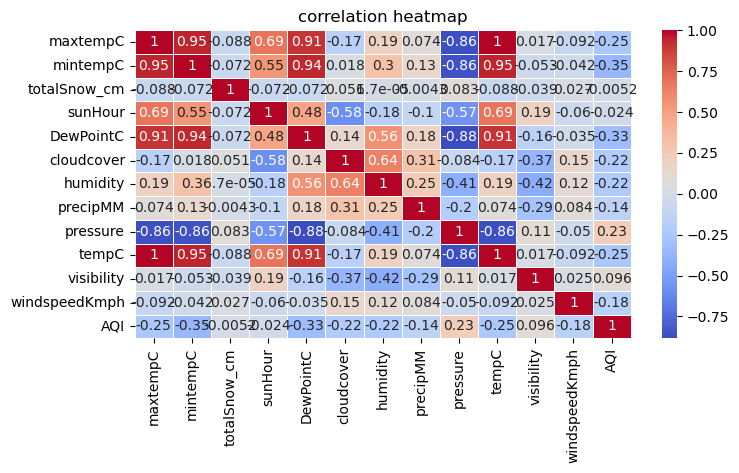

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df = df.select_dtypes(include=['number'])
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidth=0.5)
plt.title('correlation heatmap')
plt.show()

In [14]:
df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'DewPointC',
       'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'windspeedKmph', 'AQI'],
      dtype='object')

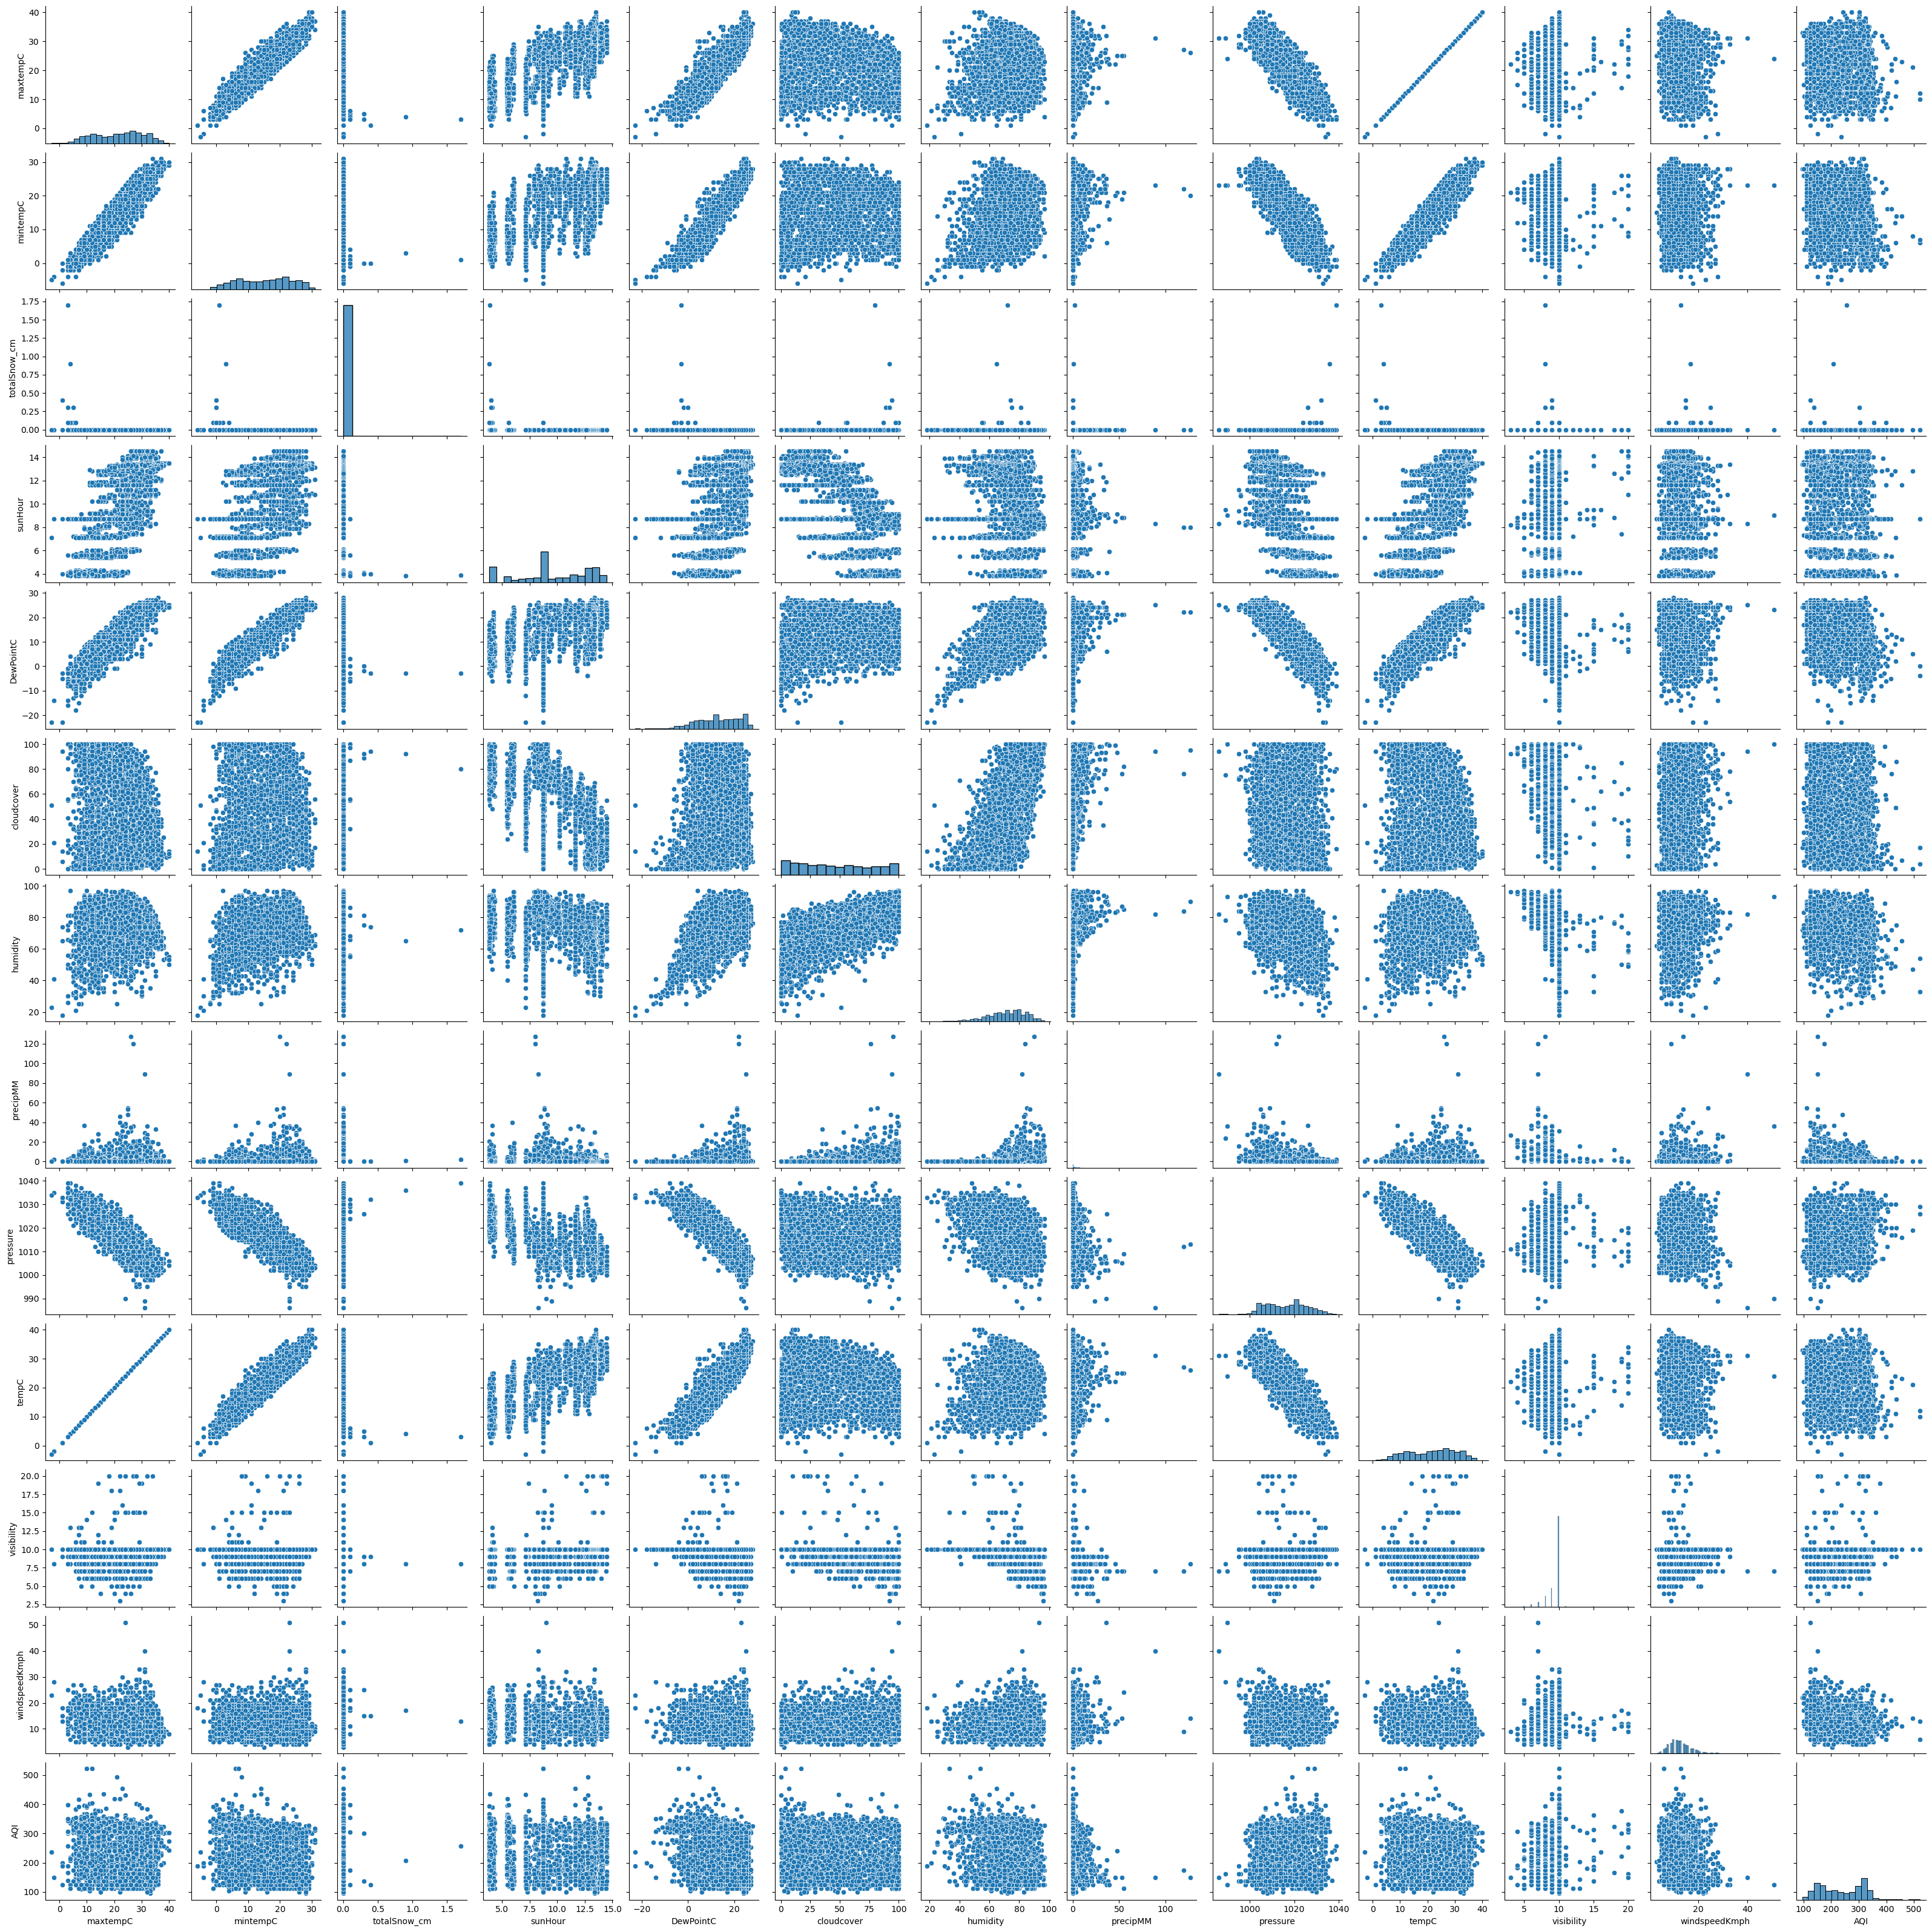

In [41]:
import seaborn as sns

sns.pairplot(df)
plt.show()

In [103]:
df.drop(columns=['windspeedKmph','totalSnow_cm','humidity','visibility','precipMM','cloudcover','tempC'])

,maxtempC,mintempC,sunHour,DewPointC,pressure,AQI
0,15.0,5.0,8.7,-1.0,1021.0,319.0
1,14.0,7.0,8.7,4.0,1019.0,352.0
2,16.0,9.0,8.7,3.0,1017.0,338.0
3,10.0,4.0,5.5,3.0,1022.0,355.0
4,10.0,3.0,8.7,3.0,1024.0,343.0
...,...,...,...,...,...,...
2497,12.0,10.0,4.0,7.0,1023.0,229.0
2498,11.0,7.0,8.7,4.0,1024.0,200.0
2499,10.0,4.0,8.7,-5.0,1028.0,309.0
2500,9.0,6.0,8.7,-9.0,1030.0,320.0


In [105]:
##model creation 
from sklearn.model_selection import train_test_split

y = df['AQI']

In [107]:
x = df.drop(columns=['AQI'])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
## scaling the values 

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [63]:
### tring descision tree algo

In [111]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = DecisionTreeRegressor(max_depth=5)


In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [113]:
model.fit(x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled)
    
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'"RMSE": {rmse},\n "MAE" : {mae},\n "R2 score" : {r2}')

"RMSE": 65.52282636628601,
 "MAE" : 54.276235309668714,
 "R2 score" : 0.25498394552218284


In [ ]:
## trying  random forest algo 

In [132]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

In [133]:
    
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'"RMSE": {rmse},\n "MAE" : {mae},\n "R2 score" : {r2}')

"RMSE": 61.68905300358437,
 "MAE" : 50.43934131736527,
 "R2 score" : 0.3396159233615197


In [ ]:
## trying xgboost

In [137]:
from xgboost import XGBRegressor

In [142]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1,random_state=42)
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

    
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'"RMSE": {rmse},\n "MAE" : {mae},\n "R2 score" : {r2}')

"RMSE": 63.857210256616895,
 "MAE" : 51.79144731776681,
 "R2 score" : 0.29237972314045235


In [ ]:
# # Plot Actual vs Predicted

# import matplotlib.pyplot as plt

# plt.scatter(y_test, y_test, color='blue', alpha=0.5, label = 'actual points')
# plt.scatter(y_test,y_pred, color='yellow', alpha=0.5, label = 'predicted points')

# plt.xlabel('True values')
# plt.ylabel('predicted values')
# plt.title('plot of actual vs predicted points')
# plt.legend()
# plt.show()